In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [18]:
def aggregate_individual_data(raw=pd.DataFrame, to_average=None ):
    """
    for the raw data of one individual a new df is generated with the variables as columns. Values are summed unless their variable name is 
    specified to be averaged in to_average.

    Parameters
    ----------
    INPUT
    raw : df
        DataFrame with the raw data
    to_average : array-like
        array specifiying which variables to average

    RETURNS
    processed : df
        DataFrame wiht the processed data
    """

    # add column with date only
    raw['time'] = pd.to_datetime(raw.loc[:,'time'])
    raw['date'] = raw['time'].dt.date

    # initialize new df with variables as columns
    processed = pd.DataFrame(columns= raw['variable'].unique())
    processed.insert(0, 'date', [])

    # fill df
    # loop over days
    for i, day in enumerate(raw['date'].unique()):
        processed.loc[i, 'date'] = day
        row = (raw['date'] == day)

        # loop over variables
        for col in processed.columns[1:-1]:

            # average values of given specified variables
            if col in to_average:
                processed.loc[i, col] = raw.loc[row & (raw['variable'] == col)].value.mean()
            
            # sum values for the other variables
            else:
                processed.loc[i, col] = raw.loc[row & (raw['variable'] == col)].value.sum()

    # sort the df according to date
    processed['date'] = pd.to_datetime(processed.loc[:,'date'])
    processed = processed.sort_values('date')

    processed.insert(1, 'weekday', processed['date'].dt.weekday)

    return processed

In [19]:
raw_data = pd.read_csv('data/dataset_mood_smartphone.csv')

In [20]:
raw_data.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [21]:
# cast id to integers
unique_ids = raw_data['id'].unique()
new_ids = np.arange(0,27,1)
raw_data['id'] = raw_data['id'].replace(unique_ids, new_ids)
raw_data.head()

,Unnamed: 0,id,time,variable,value
0,1,0,2014-02-26 13:00:00.000,mood,6.0
1,2,0,2014-02-26 15:00:00.000,mood,6.0
2,3,0,2014-02-26 18:00:00.000,mood,6.0
3,4,0,2014-02-26 21:00:00.000,mood,7.0
4,5,0,2014-02-27 09:00:00.000,mood,6.0


In [22]:
# specify variables to average
to_average = np.array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity'])

# process df for each individual
processed_dfs = []
for i in tqdm(new_ids):
    raw_df = raw_data.loc[raw_data['id'] == i].copy()
    processed_df = aggregate_individual_data(raw_df, to_average)
    processed_dfs.append(processed_df)
    processed_df.to_csv('aggregated_individual_data/'+str(i)+'_aggregated.csv')

100%|██████████| 27/27 [00:20<00:00,  1.32it/s]


<AxesSubplot:xlabel='date'>

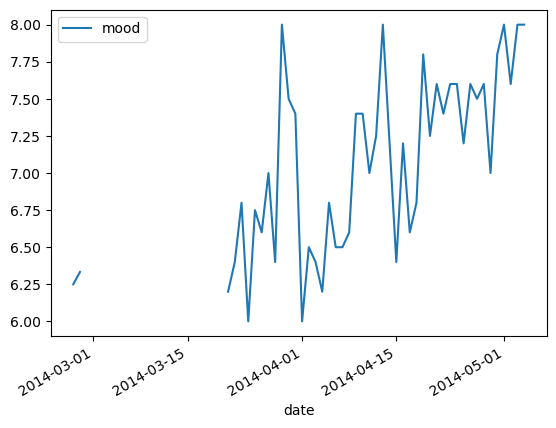

In [23]:
processed_dfs[0].plot('date', 'mood')

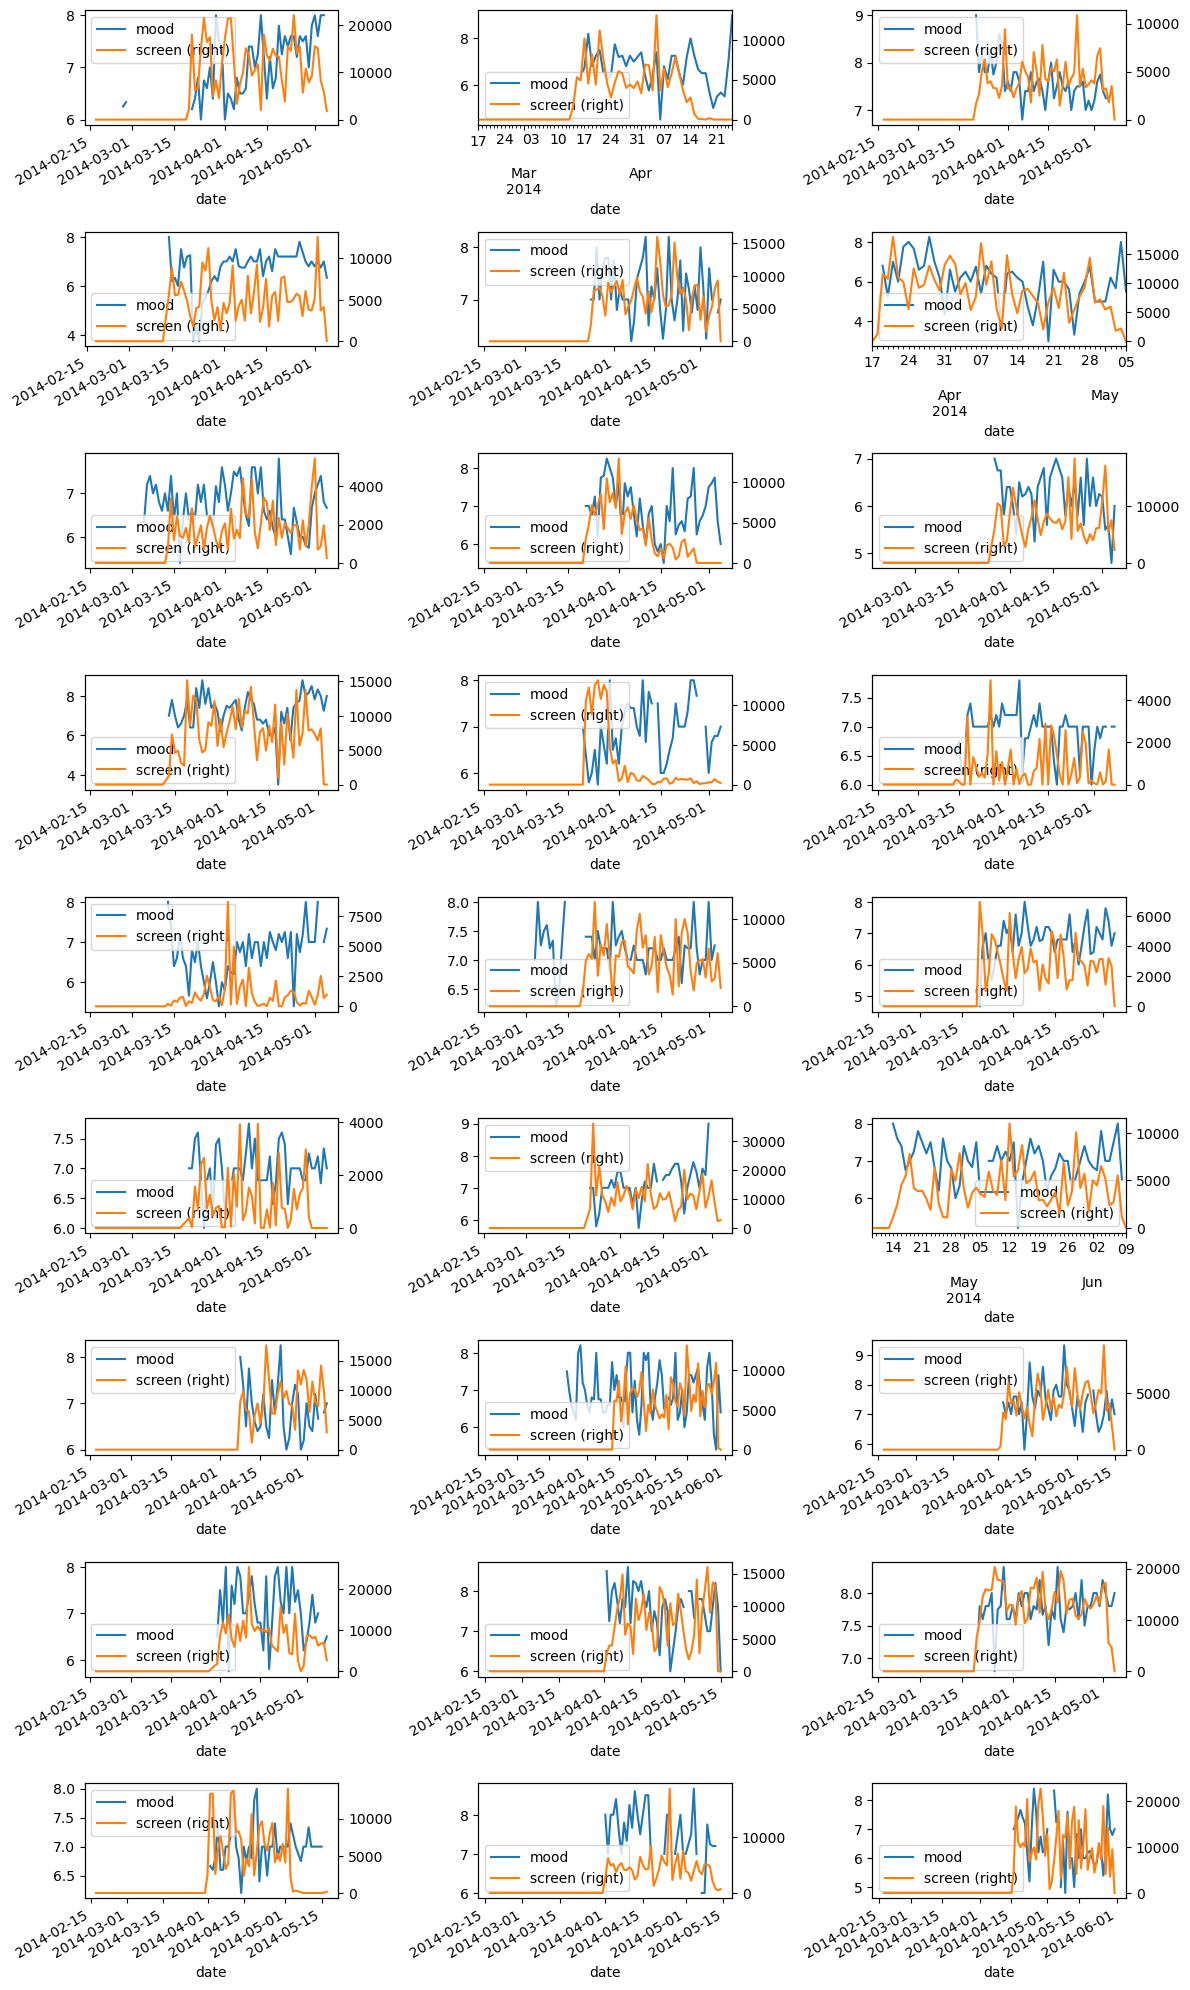

In [24]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs[counter].plot('date', 'mood', ax = axes[row, col])
        processed_dfs[counter].plot('date', 'screen', ax = axes[row, col], secondary_y=True)
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()

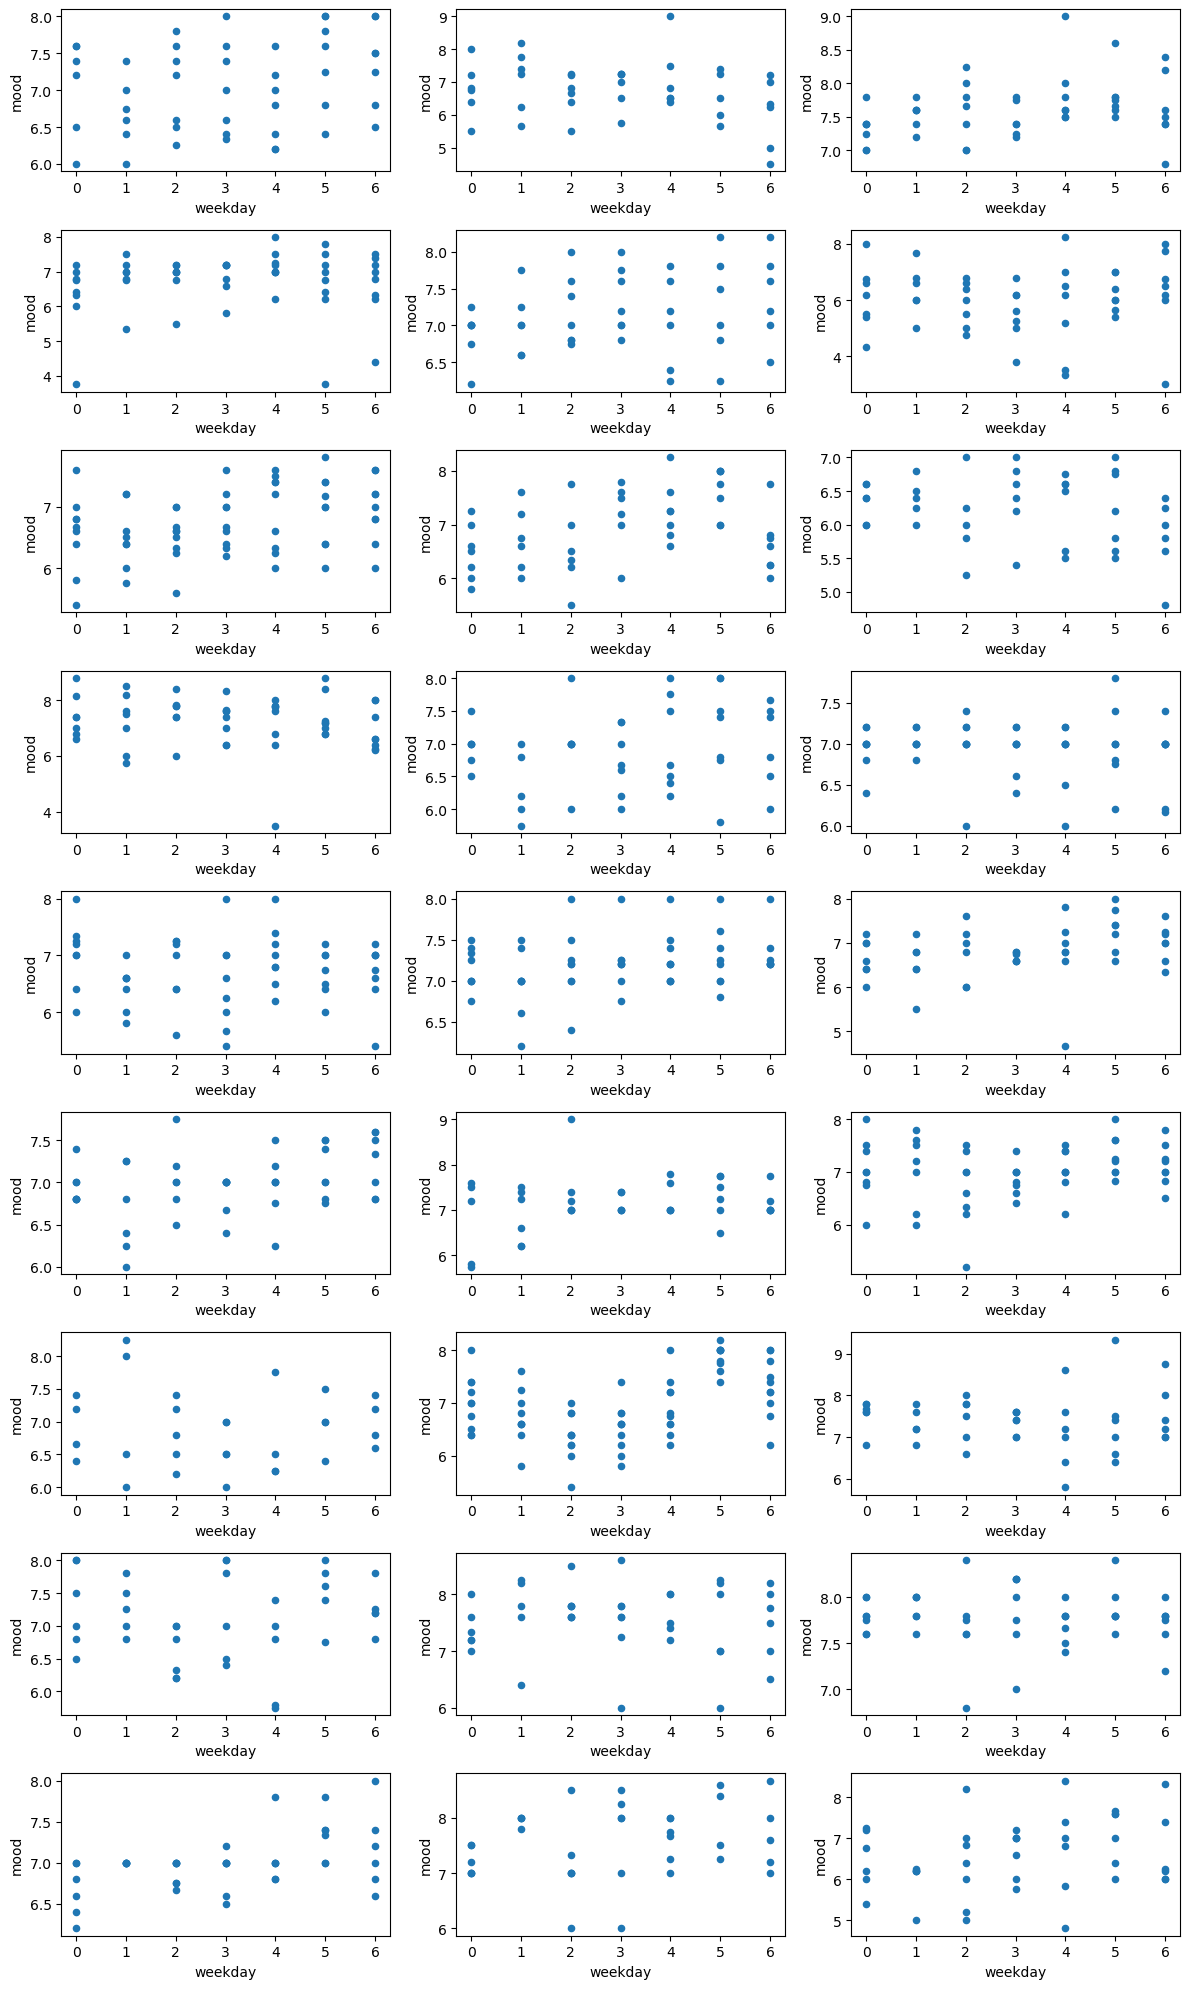

In [25]:
# plot some data
nrows = 9
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize = [12, 20])

counter = 0
for row in range(nrows):
    for col in range(ncols):
        processed_dfs[counter].plot.scatter('weekday', 'mood', ax = axes[row, col])
        #processed_dfs[counter].plot('date', 'screen', ax = axes[row, col], secondary_y=True)
        counter += 1

        if counter >= len(processed_dfs):
            break
    if counter >= len(processed_dfs):
            break
    
plt.tight_layout()